### 1) Understanding Data

* a) Understand Columns
* b) check dtype -> df[col].astype()
* c) Describe Numerical Cols
* d) Describe Categorical Cols

### 2) EXTRACT FEATURES + EDA (uni - bi(heatmap) - multi) -> Insights:
* Uni-variate Analysis
    - Histogram (values)
    - distplot (distrbution)
    - catigorical (pie / count)

* Bi-Variate Analysis
    * Num vs Num
        - Scatter (relationship btn 2 variables)
        - line (trend with time)
    * Num vs Cat (distrbution)
        - box 
        - violin
        - strip
    * Cat vs Cat
        - bar (estimate plot)
        - countplot (count rows)

* Multi-Variate Analysis
    * Pairplot

### 3) Pre-Processing Mind Map:
* a) Detect & Handle Duplicates
* b) train_test_split
* c) Detect & Handle NaNs
* d) Detect & Handle Outliers
* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f) Imbalanced: X_train_resampled
* g) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

---

In [1]:
# Manpulate
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
import user_agents # get info from user_agent (browser_info)
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo # get location from ip
from geopy.distance import great_circle # distance btn 2 (lat,long)
from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.impute import SimpleImputer, KNNImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding 
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling

In [2]:
df = pd.read_csv("train.csv")
df
# km/kg * 1.40 = km/l

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [3]:
# Understand

# understand columns
# check dtypes
df.info()
# Mileage -> float
# Engine -> float
# Power -> float
# Seats -> int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [4]:
df[df['New_Price'].isna() != True]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01 Lakh,15.00
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,47.87 Lakh,18.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,Tata Bolt Revotron XT,Chennai,2016,10000,Petrol,Manual,First,17.57 kmpl,1193 CC,88.7 bhp,5.0,7.77 Lakh,4.00
6002,Volkswagen Vento 1.6 Highline,Mumbai,2011,38000,Petrol,Manual,First,16.09 kmpl,1598 CC,103.5 bhp,5.0,11.91 Lakh,3.25
6005,Maruti Vitara Brezza VDi,Pune,2016,37208,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,9.93 Lakh,7.43
6010,Honda Brio 1.2 VX MT,Delhi,2013,33746,Petrol,Manual,First,18.5 kmpl,1198 CC,86.8 bhp,5.0,6.63 Lakh,3.20


In [5]:
# remove New_Price column as its not our target
df.drop("New_Price", axis=1, inplace=True)

In [6]:
# Mileage -> float
df['Mileage']

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 6019, dtype: object

In [7]:
def format_mileage(arg):
    ## '26.6 km/kg'
    # km/kg * 1.4 => km/l
    if pd.isna(arg) == True:
        return arg
    else:
        words = arg.split(" ")
        if words[1].lower() == "km/kg":
            return float(words[0]) * 1.4
        elif words[1].lower() == 'kmpl':
            return float(words[0])
        else:
            return arg
df['Mileage'] = df['Mileage'].apply(format_mileage)
df['Mileage']

0       37.24
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: Mileage, Length: 6019, dtype: float64

In [8]:
# Engine -> float
df['Engine']

0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
6014    1248 CC
6015    1120 CC
6016    2498 CC
6017     998 CC
6018     936 CC
Name: Engine, Length: 6019, dtype: object

In [9]:
df['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [10]:
def format_engine(arg):
    # '5204 CC'
    if pd.isna(arg) == True:
        return arg
    return float(arg.split(" ")[0])
df['Engine'] = df['Engine'].apply(format_engine)
df['Engine']

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
6014    1248.0
6015    1120.0
6016    2498.0
6017     998.0
6018     936.0
Name: Engine, Length: 6019, dtype: float64

In [11]:
# Power -> float
df['Power']

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 6019, dtype: object

In [12]:
df['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [13]:
def format_power(arg):
    # NaN
    if pd.isna(arg) == True:
        return arg
    # Else
    # '116.4 bhp'
    # 'null bhp'
    if type(arg) == float:
        return arg
    value = arg.split(" ")[0]
    if value == 'null':
        return np.nan
    return float(value)
df['Power'] = df['Power'].apply(format_power)
df['Power']

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
6014     74.00
6015     71.00
6016    112.00
6017     67.10
6018     57.60
Name: Power, Length: 6019, dtype: float64

In [14]:
# Seats -> int
df['Seats'].unique() # leave it till now

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [15]:
# describe
df.describe()
# Mileage: 0 (new vichele)
# Engine: 72.000000
# Seats: 0, 10
# price: 160? 

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,18.242474,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,4.879633,601.355233,53.874957,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.260000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.190000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,46.956000,5998.000000,560.000000,10.000000,160.000000


In [16]:
# Engine: 72.000000 (correct => electric car)
df[df['Engine'] < 600]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.0


In [17]:
# Seats: 0 (fix)
indices_to_remove = df[df["Seats"] < 1].index
df.drop(indices_to_remove, axis=0, inplace=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [18]:
# price: 160?  (correct value)
df[df['Price'] > 150]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,160.0


In [19]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6018.000000,6.018000e+03,6016.000000,5982.000000,5876.000000,5976.000000,6018.000000
mean,2013.358425,5.872737e+04,18.243761,1621.013039,113.253050,5.279618,9.478053
std,3.269967,9.127243e+04,4.879017,601.060211,53.874957,0.806019,11.188307
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.260000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.190000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,46.956000,5998.000000,560.000000,10.000000,160.000000


In [20]:
# describe cat
cat_cols = df.select_dtypes(include="O").columns
for col in cat_cols:
    print(f"number of uniques of \'{col}\' is: {df[col].nunique()}")
    print(f"uniques of \'{col}\' is:\n{df[col].unique()}")
    print()
    print('*' * 50)
    print()

number of uniques of 'Name' is: 1875
uniques of 'Name' is:
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Volkswagen Polo IPL II 1.2 Petrol Highline'
 'Tata Bolt Revotron XT' 'Mahindra Xylo D4 BSIV']

**************************************************

number of uniques of 'Location' is: 11
uniques of 'Location' is:
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']

**************************************************

number of uniques of 'Fuel_Type' is: 5
uniques of 'Fuel_Type' is:
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']

**************************************************

number of uniques of 'Transmission' is: 2
uniques of 'Transmission' is:
['Manual' 'Automatic']

**************************************************

number of uniques of 'Owner_Type' is: 4
uniques of 'Owner_Type' is:
['First' 'Second' 'Fourth & Above' 'Third']

**************************************************



In [21]:
# Feature Extraction:
## from name we can extract brand & model
def get_brand(arg):
    return arg.split(" ")[0]
df['Brand'] = df['Name'].apply(get_brand)
df['Brand']

0          Maruti
1         Hyundai
2           Honda
3          Maruti
4            Audi
          ...    
6014       Maruti
6015      Hyundai
6016     Mahindra
6017       Maruti
6018    Chevrolet
Name: Brand, Length: 6018, dtype: object

In [22]:
# drop Name column as its determined using it's other features like [seats, mileage, ...]
df.drop("Name", axis=1, inplace=True)

In [23]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Kilometers_Driven'}>,
        <Axes: title={'center': 'Mileage'}>],
       [<Axes: title={'center': 'Engine'}>,
        <Axes: title={'center': 'Power'}>,
        <Axes: title={'center': 'Seats'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

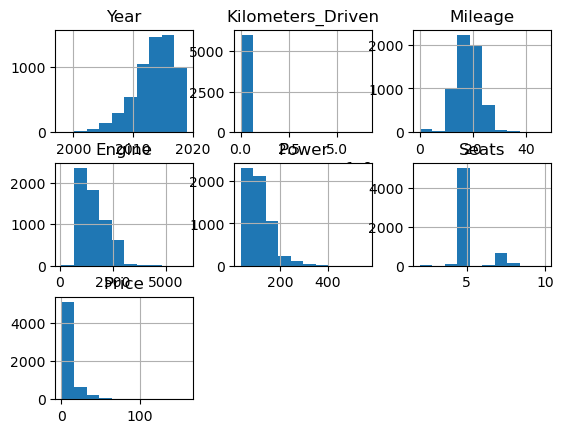

In [24]:
# EDA
## Univariate Anaylsis
df.hist()

In [25]:
# New
df.drop_duplicates(inplace=True)
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train.shape, X_test.shape

((4812, 11), (1204, 11))

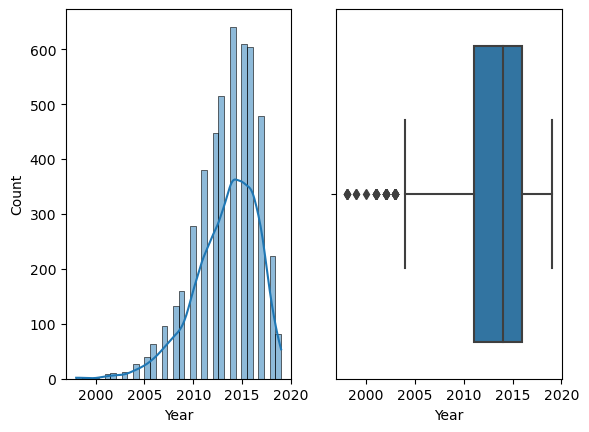

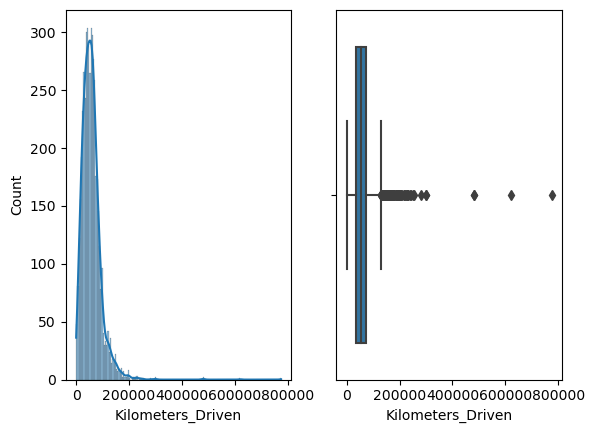

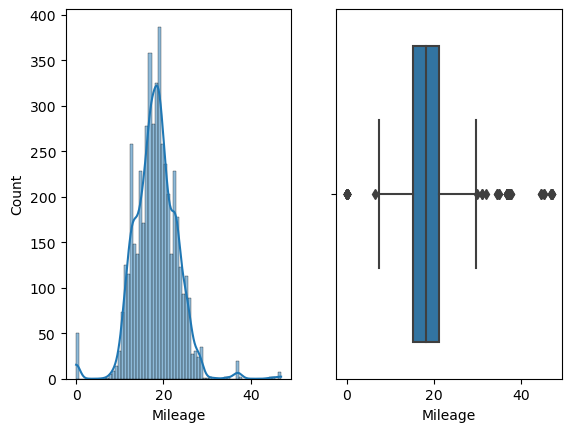

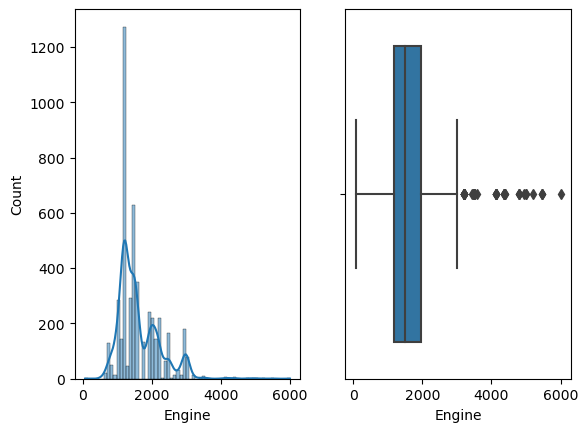

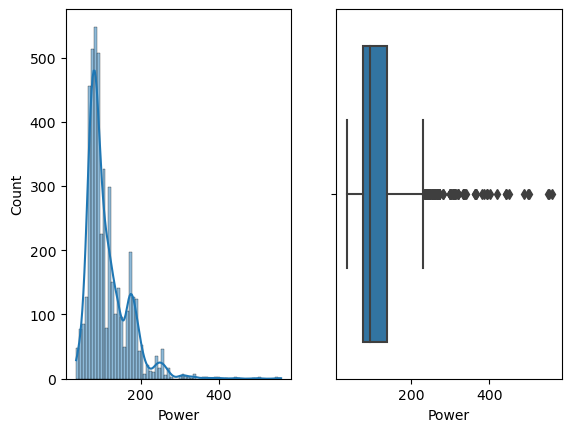

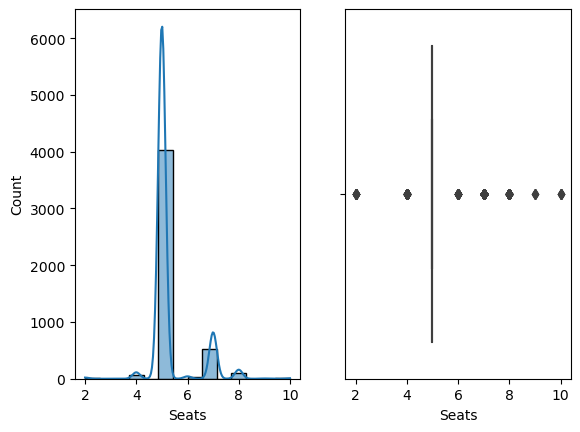

In [26]:
num_cols = X_train.select_dtypes(include="number").columns
for col in num_cols:
    fig, axes= plt.subplots(nrows=1, ncols=2)
    sns.histplot(X_train[col], kde=True, ax=axes[0])
    sns.boxplot(x=X_train[col], ax=axes[1])
    plt.show()

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


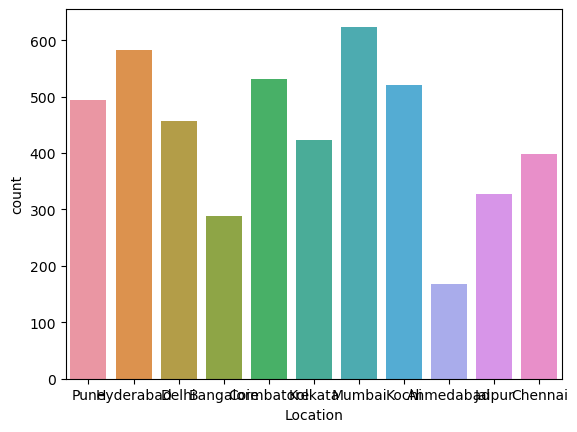

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


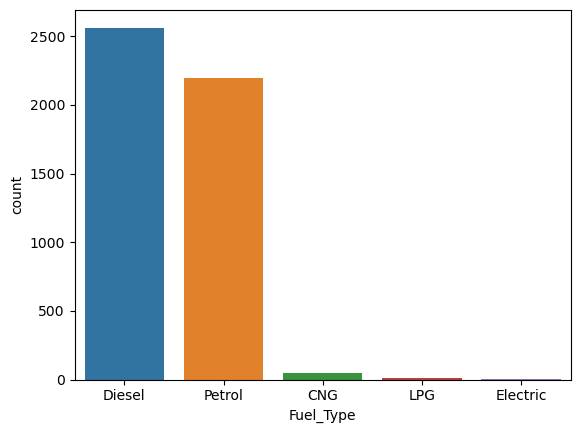

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


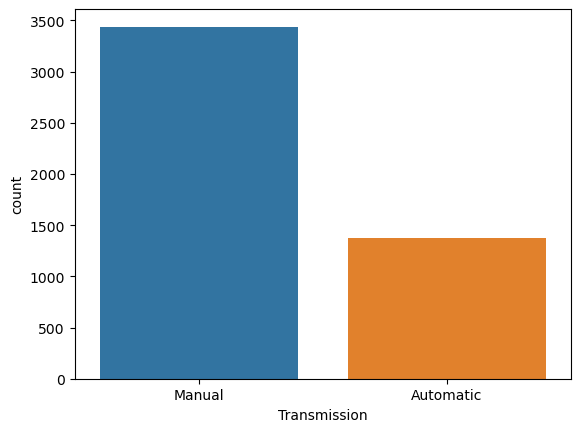

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


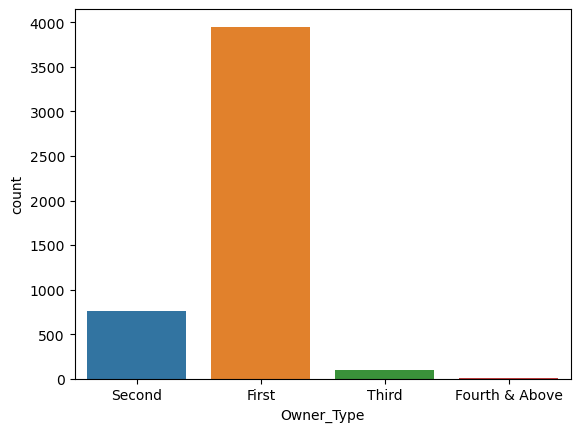

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


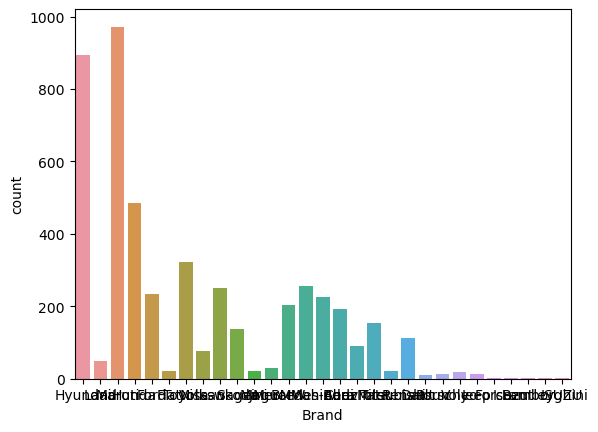

In [27]:
cat_cols = X_train.select_dtypes(include='O').columns
for col in cat_cols:
    sns.countplot(x=X_train[col])
    plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_1304\585034728.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

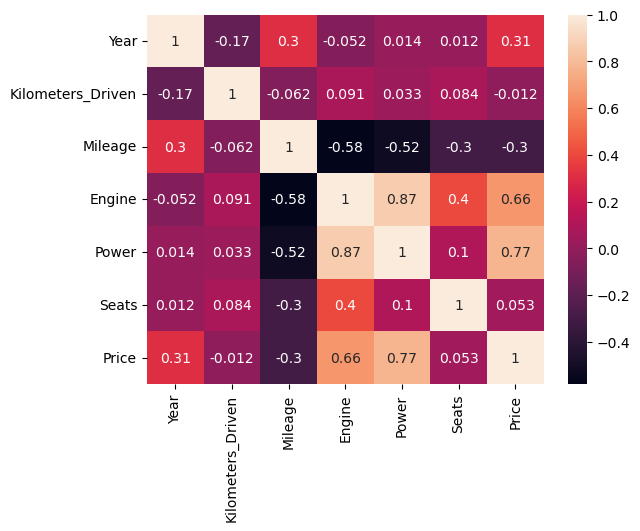

In [28]:
## bi-varaites
sns.heatmap(df.corr(), annot=True)

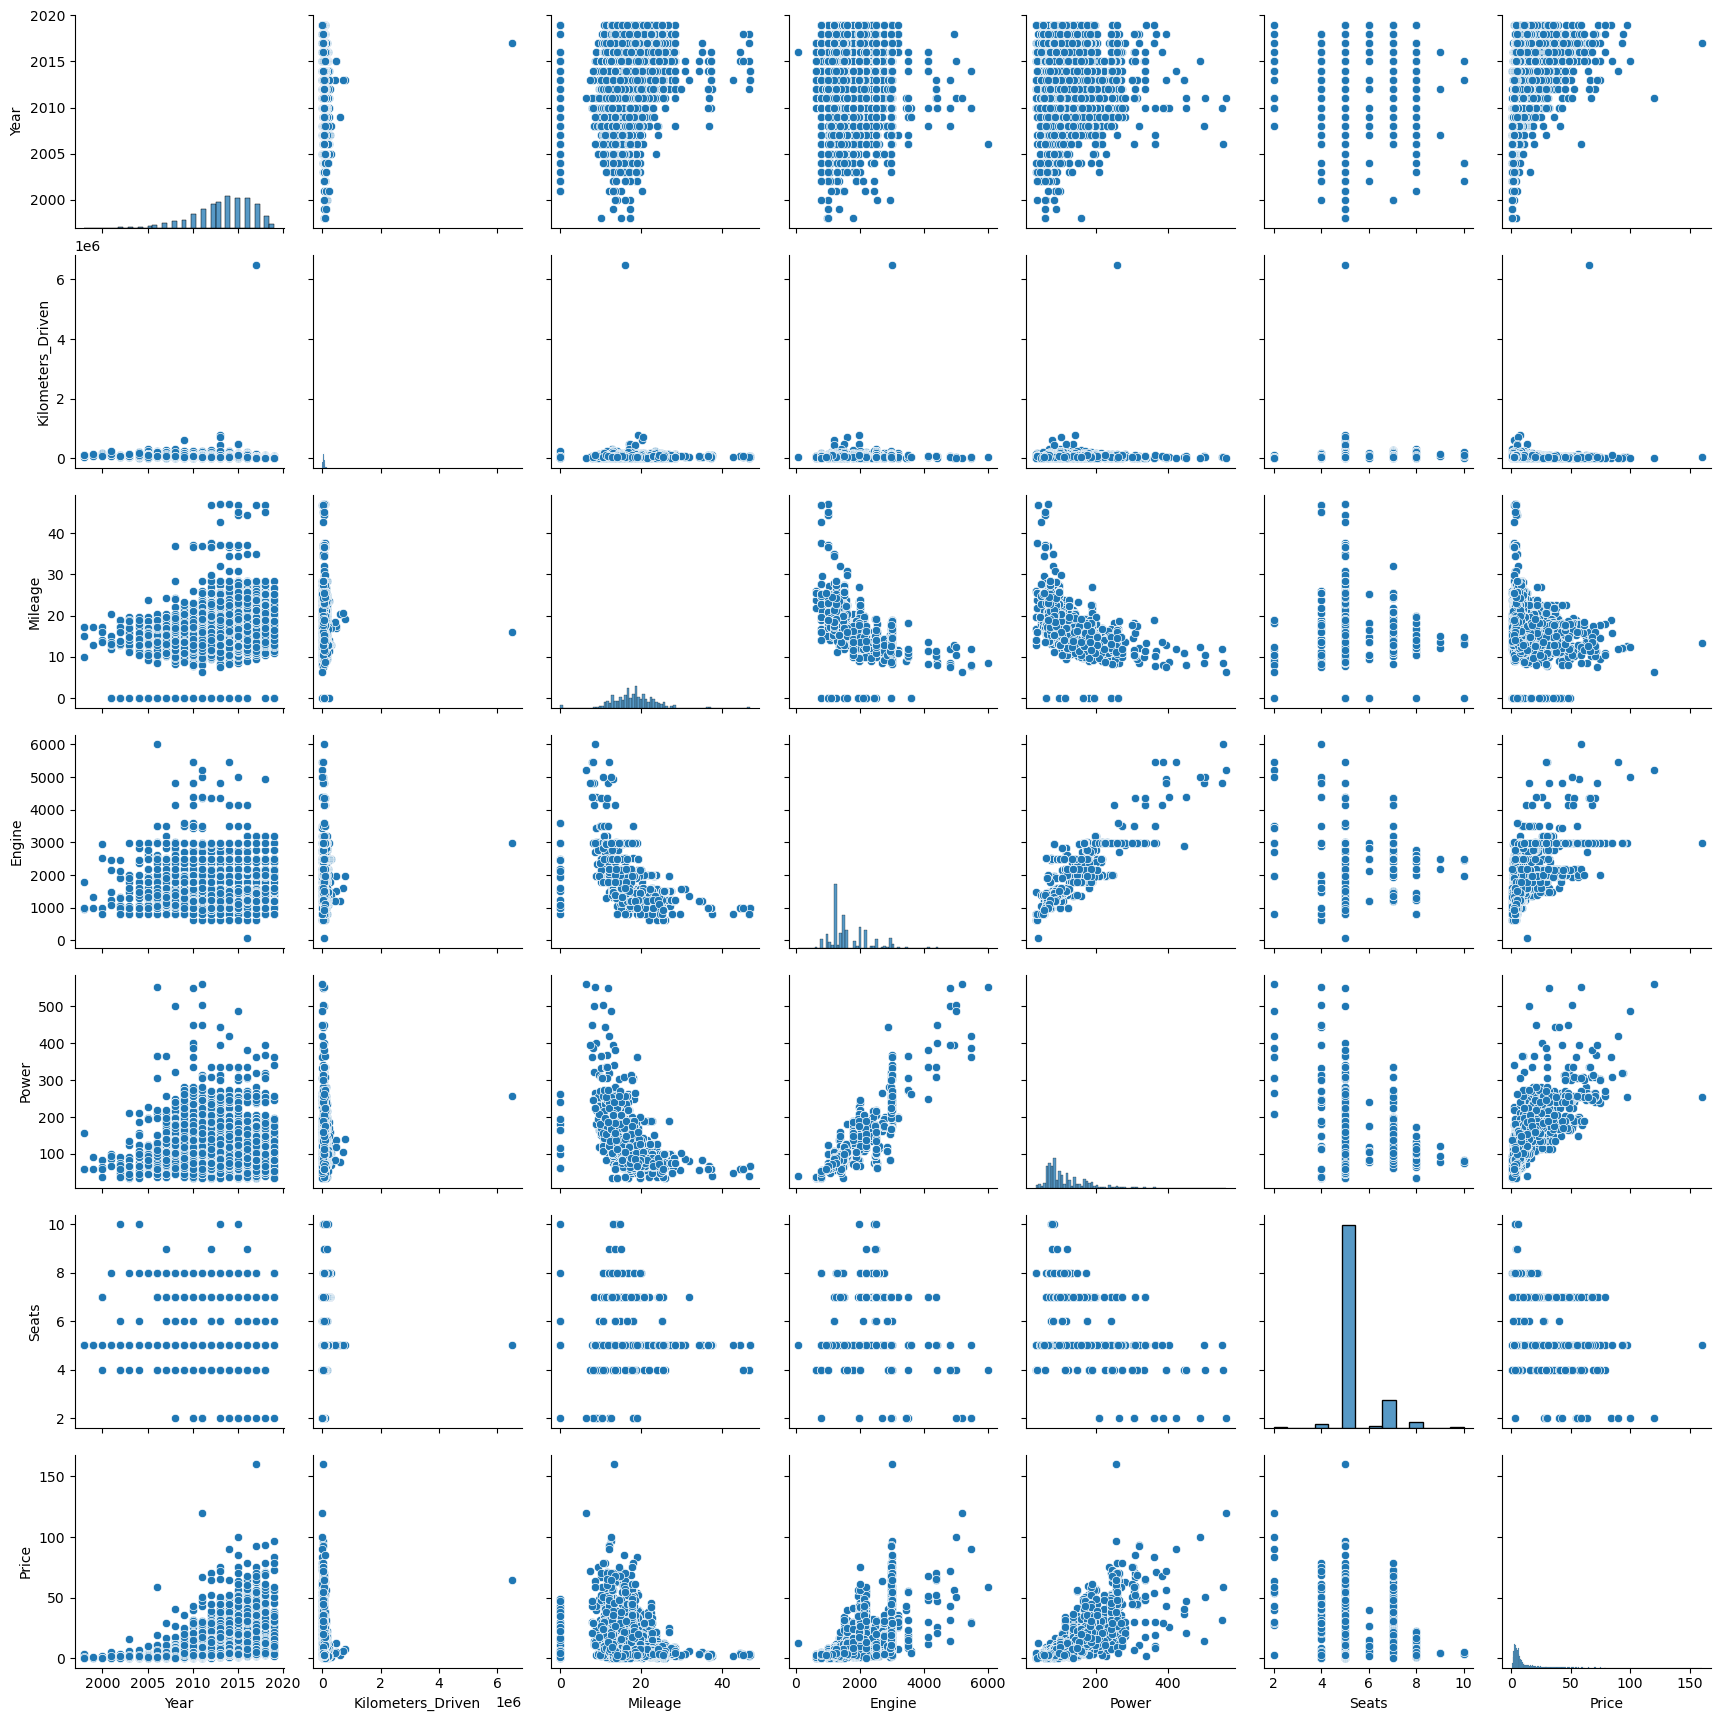

In [29]:
# multi
sns.pairplot(df)

In [30]:
# Pre-processing

## drop duplicates
## train_test_split
## detect and handle nans
## detect and handle outliers
## Encoding
## imbalanced
## scaling

In [31]:
X_train

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
4677,Pune,2012,49700,Diesel,Manual,Second,21.90,1396.0,88.76,5.0,Hyundai
1204,Hyderabad,2012,96000,Diesel,Automatic,First,12.35,2179.0,187.74,5.0,Land
5643,Pune,2003,125000,Petrol,Manual,Second,18.90,998.0,67.10,5.0,Maruti
4640,Delhi,2013,75348,Diesel,Manual,First,25.80,1498.0,98.60,5.0,Honda
5565,Bangalore,2012,97000,Diesel,Automatic,Second,19.08,1582.0,126.32,5.0,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...
3773,Chennai,2015,15000,Petrol,Automatic,First,18.90,1197.0,82.00,5.0,Hyundai
5194,Hyderabad,2014,46000,Diesel,Manual,Second,20.14,1498.0,88.80,5.0,Volkswagen
5229,Bangalore,2012,73000,Diesel,Automatic,First,22.69,1995.0,190.00,5.0,BMW
5393,Pune,2010,45252,Petrol,Manual,First,18.90,1197.0,81.86,5.0,Hyundai


In [32]:
## train_test_split (already done)

In [33]:
## detect and handle nans
## detect and handle outliers
## solve distrbution
## Encoding
## scaling

X_train.isna().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                27
Power                109
Seats                 31
Brand                  0
dtype: int64

In [34]:
## detect and handle outliers
## transformers: log, lp & up


In [35]:
from sklearn.base import BaseEstimator, TransformerMixin
class LogTransfomer(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):  # always return self
        # calculate what is needed to make .transform()
        # self.mean_ = np.mean(x)
        self.n_features_in_ = x.shape[1] 
        return self
    
    def transform(self, x, y=None):
        assert self.n_features_in_ == x.shape[1]
        return np.log1p(x)
    
log_transformer = LogTransfomer()
log_transformer

LogTransfomer()

In [36]:
def handle_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    data[data > ub] = ub
    data[data < lb] = lb
    return data, ub, lb

def handle_outliers_test(test_data, ub_train, lb_train):
    test_data[test_data > ub_train] = ub_train
    test_data[test_data < lb_train] = lb_train
    return test_data

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

class Handle_outliers_lb_ub(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        self.n_features_in_ = X.shape[1] 
        q1 = np.percentile(X, 25)
        q3 = np.percentile(X, 75)
        iqr = q3 - q1
        ub_train = q3 + 1.5 * iqr
        lb_train = q1 - 1.5 * iqr
        self.ub_train = ub_train
        self.lb_train = lb_train
        return self

    def transform(self, X, y=None):
        assert self.n_features_in_ == X.shape[1]
        X[X > self.ub_train] = self.ub_train
        X[X < self.lb_train] = self.lb_train
        return X
    
h_lb_ub = Handle_outliers_lb_ub()
h_lb_ub

Handle_outliers_lb_ub()

In [38]:
# median_imputer = SimpleImputer(strategy='median')
# median_imputer.fit_transform(df[])

# median for numeric
# mode for categorical
from sklearn.pipeline import Pipeline

In [39]:
cat_cols = X_train.select_dtypes(include="O").columns

for col in cat_cols:
    print(f"number of uniques of \'{col}\' is: {X_train[col].nunique()}")
    print(f"uniques of \'{col}\' is:\n{X_train[col].unique()}")
    print()
    print('*' * 50)
    print()

# Location: nominal: binaryEncoder
# Fuel_Type: nominal: OHE
# Transmission: nominal: OHE
# Owner_Type: ordinal: First=3
# Brand: nominal: BinaryEncoder

number of uniques of 'Location' is: 11
uniques of 'Location' is:
['Pune' 'Hyderabad' 'Delhi' 'Bangalore' 'Coimbatore' 'Kolkata' 'Mumbai'
 'Kochi' 'Ahmedabad' 'Jaipur' 'Chennai']

**************************************************

number of uniques of 'Fuel_Type' is: 5
uniques of 'Fuel_Type' is:
['Diesel' 'Petrol' 'CNG' 'LPG' 'Electric']

**************************************************

number of uniques of 'Transmission' is: 2
uniques of 'Transmission' is:
['Manual' 'Automatic']

**************************************************

number of uniques of 'Owner_Type' is: 4
uniques of 'Owner_Type' is:
['Second' 'First' 'Third' 'Fourth & Above']

**************************************************

number of uniques of 'Brand' is: 29
uniques of 'Brand' is:
['Hyundai' 'Land' 'Maruti' 'Honda' 'Ford' 'Fiat' 'Toyota' 'Nissan'
 'Volkswagen' 'Skoda' 'Mini' 'Jaguar' 'BMW' 'Mercedes-Benz' 'Mahindra'
 'Audi' 'Chevrolet' 'Tata' 'Mitsubishi' 'Renault' 'Datsun' 'Porsche'
 'Volvo' 'Jeep' 'Force' 'Isu

In [40]:
from sklearn.pipeline import Pipeline

## Years
years_pipeline = Pipeline(steps=[
    ("median_num_imputer", SimpleImputer(strategy='median')),
    ("scale", RobustScaler())
    ]
)

# seats
seats_pipeline = Pipeline(steps=[
    ("median_num_imputer", SimpleImputer(strategy='most_frequent')),
    ]
)

# kilometers & power
km_power_pipeline = Pipeline(steps=[
    ("median_num_imputer", SimpleImputer(strategy='median')),
    ("log", LogTransfomer()),
    ("scale", RobustScaler())
    ]
)

# engine & milage
enginer_milage_pipeline = Pipeline(steps=[
    ("median_num_imputer", SimpleImputer(strategy='median')),
    ("log", Handle_outliers_lb_ub()),
    ("scale", StandardScaler())
    ]
)

# cat_cols:
# Location: nominal: binaryEncoder
# Fuel_Type: nominal: OHE
# Transmission: nominal: OHE
# Owner_Type: ordinal: First=3
# Brand: nominal: BinaryEncoder

location_brand_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy='most_frequent')),
    ("encode", BinaryEncoder())
])


fuel_transmision_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy='most_frequent')),
    ("encode", OneHotEncoder(drop='first', sparse_output=False))
])

# ['First' 'Second' 'Fourth & Above' 'Third']
owner_type_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy='most_frequent')),
    ("encode", OrdinalEncoder(categories=[["Fourth & Above", "Third", "Second", "First"]]))
])

In [41]:
## Years
owner_type_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('encode',
                 OrdinalEncoder(categories=[['Fourth & Above', 'Third',
                                             'Second', 'First']]))])

In [42]:
X_train.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Brand'],
      dtype='object')

In [43]:
# specify each pipeline to it's column
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(transformers=[
        ("years_pipeline", years_pipeline, ['Year']),
        ("seats_pipeline", seats_pipeline, ['Seats']),
        ("km_power_pipeline", km_power_pipeline, ['Kilometers_Driven', "Power"]),
        ("enginer_milage_pipeline", enginer_milage_pipeline, ['Engine', "Mileage"]),
        ("location_brand_pipeline", location_brand_pipeline, ['Location', "Brand"]),
        ("fuel_transmision_pipeline", fuel_transmision_pipeline, ['Fuel_Type', "Transmission"]),
        ("owner_type_pipeline", owner_type_pipeline, ['Owner_Type'])
    ]
)
preprocessing

ColumnTransformer(transformers=[('years_pipeline',
                                 Pipeline(steps=[('median_num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', RobustScaler())]),
                                 ['Year']),
                                ('seats_pipeline',
                                 Pipeline(steps=[('median_num_imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Seats']),
                                ('km_power_pipeline',
                                 Pipeline(steps=[('median_num_imputer',
                                                  SimpleImputer(strategy...
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['Fuel_Type', 'Transmission']),
                                ('owner_type_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OrdinalEncoder(categories=[['Fourth '
                                                                              '& '
                                                                              'Above',
                                                                              'Third',
                                                                              'Second',
                                                                              'First']]))]),
                                 ['Owner_Type'])])

In [44]:
X_preprocessed = preprocessing.fit_transform(X_train)
X_preprocessed

array([[-0.4       ,  5.        , -0.08484596, ...,  0.        ,
         1.        ,  2.        ],
       [-0.4       ,  5.        ,  0.7840396 , ...,  0.        ,
         0.        ,  3.        ],
       [-2.2       ,  5.        ,  1.13242493, ...,  1.        ,
         1.        ,  2.        ],
       ...,
       [-0.4       ,  5.        ,  0.42255851, ...,  0.        ,
         0.        ,  3.        ],
       [-0.8       ,  5.        , -0.20858765, ...,  1.        ,
         1.        ,  3.        ],
       [-0.6       ,  8.        ,  0.81125319, ...,  0.        ,
         1.        ,  2.        ]])

In [45]:
X_preprocessed.shape

(4812, 21)

In [46]:
pd.DataFrame(X_preprocessed).describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,4812.000000,4812.000000,4812.000000,4812.000000,4.812000e+03,4.812000e+03,4812.000000,4812.000000,4812.000000,4812.000000,...,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000
mean,-0.123566,5.274522,-0.150882,0.156299,-8.859635e-17,2.022950e-16,0.293641,0.387988,0.584165,0.555071,...,0.253741,0.402535,0.460308,0.679135,0.532627,0.000416,0.001870,0.455736,0.714672,2.798213
std,0.649002,0.799391,0.919224,0.702553,1.000104e+00,1.000104e+00,0.455477,0.487343,0.492917,0.497010,...,0.435196,0.490460,0.498474,0.466857,0.498986,0.020385,0.043211,0.498089,0.451618,0.457975
min,-3.200000,2.000000,-7.563356,-1.717757,-2.668277e+00,-3.739950e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.600000,5.000000,-0.585898,-0.341132,-7.210999e-01,-6.187523e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,5.000000,0.000000,0.000000,-2.087760e-01,-1.742063e-02,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,0.400000,5.000000,0.414102,0.658868,6.133652e-01,5.757297e-01,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000
max,1.000000,10.000000,3.540503,3.072496,3.620152e+00,5.864176e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [47]:
log_transformer = LogTransfomer()
y_preprocessed = log_transformer.fit_transform(np.array(y_train).reshape(-1, 1))
y_preprocessed

array([[1.64480506],
       [2.99473177],
       [0.58778666],
       ...,
       [2.60268969],
       [1.178655  ],
       [1.87180218]])

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: >

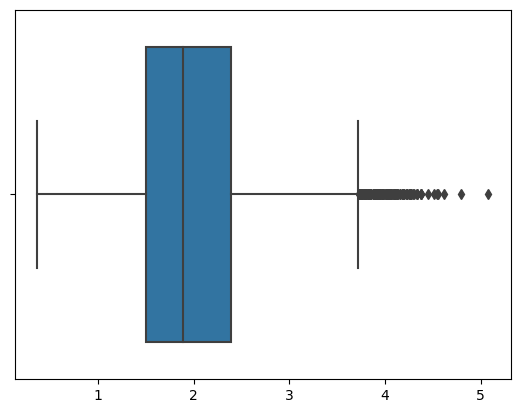

In [48]:
sns.boxplot(y_preprocessed)

# Modeling

In [49]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
model = LinearRegression()
model.fit(X_preprocessed, y_preprocessed)
model.score(X_preprocessed, y_preprocessed)

0.872522127943301

In [50]:
from sklearn.metrics import mean_squared_error
y_preprocessed_pred = model.predict(X_preprocessed)
mean_squared_error(y_true=y_preprocessed, y_pred=y_preprocessed_pred)

0.07094253524991995

In [51]:
# valid set importance: for hyperparameters tuning & determine best 5 models
X_preprocessed_train, X_preprocessed_valid, y_preprocessed_train, y_preprocessed_valid = train_test_split(X_preprocessed, y_preprocessed, test_size=0.2, shuffle=True, random_state=42)
model.fit(X_preprocessed_train, y_preprocessed_train)
print(model.score(X_preprocessed_train, y_preprocessed_train))
print(model.score(X_preprocessed_valid, y_preprocessed_valid))

0.8688308448274249
0.8855438183912958


In [52]:
from sklearn.model_selection import cross_val_score

## all metrics in cross_val_score
# https://scikit-learn.org/stable/modules/model_evaluation.html
val_scores = -1 * cross_val_score(LinearRegression(), X_preprocessed, y_preprocessed, cv=5, scoring='neg_mean_squared_error')
val_scores

array([0.06526761, 0.07049534, 0.08079101, 0.06828624, 0.07478388])

In [53]:
pd.DataFrame(val_scores).describe()

,0
count,5.000000
mean,0.071925
std,0.006049
min,0.065268
25%,0.068286
50%,0.070495
75%,0.074784
max,0.080791


### Let's try to get more complex model (polynomial regression) to solve this small underfit:

**Generalization Error = bias + variance + irreducable error (noise in data / outliers / ...)**

--- 
**Underfitting Solution (High Bias):**

1- get more complex model

2- get more releveant features

3-  decrease model constrains

---
**Overfitting Solution (High Variance):**

1- get more simple model

2- get more data till valid_loss become nearly train_loss

3-  increase model constrains (regularization)

(as models with alot of degree of freedom have many hyperparameters so constrain them)

## Polynomial Regression

In [54]:
# More Complex Model: 
## Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

# poly_features = PolynomialFeatures(degree=2)
# poly_features.fit_transform(X_train)
# poly_features.fit_transform(X_test)

In [55]:
from sklearn.pipeline import Pipeline

## Years
years_pipeline = Pipeline(steps=[
    ("median_num_imputer", SimpleImputer(strategy='median')),
    ("scale", RobustScaler())
    ]
)

# seats
seats_pipeline = Pipeline(steps=[
    ("median_num_imputer", SimpleImputer(strategy='most_frequent')),
    ]
)

# kilometers & power
km_power_pipeline = Pipeline(steps=[
    ("median_num_imputer", SimpleImputer(strategy='median')),
    ("log", LogTransfomer()),
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("scale", RobustScaler())
    ]
)

# engine & milage
enginer_milage_pipeline = Pipeline(steps=[
    ("median_num_imputer", SimpleImputer(strategy='median')),
    ("log", Handle_outliers_lb_ub()),
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("scale", StandardScaler())
    ]
)

# cat_cols:
# Location: nominal: binaryEncoder
# Fuel_Type: nominal: OHE
# Transmission: nominal: OHE
# Owner_Type: ordinal: First=3
# Brand: nominal: BinaryEncoder

location_brand_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy='most_frequent')),
    ("encode", BinaryEncoder())
])


fuel_transmision_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy='most_frequent')),
    ("encode", OneHotEncoder(drop='first', sparse_output=False))
])

# ['First' 'Second' 'Fourth & Above' 'Third']
owner_type_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy='most_frequent')),
    ("encode", OrdinalEncoder(categories=[["Fourth & Above", "Third", "Second", "First"]]))
])

In [56]:
# specify each pipeline to it's column
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(transformers=[
        ("years_pipeline", years_pipeline, ['Year']),
        ("seats_pipeline", seats_pipeline, ['Seats']),
        ("km_power_pipeline", km_power_pipeline, ['Kilometers_Driven', "Power"]),
        ("enginer_milage_pipeline", enginer_milage_pipeline, ['Engine', "Mileage"]),
        ("location_brand_pipeline", location_brand_pipeline, ['Location', "Brand"]),
        ("fuel_transmision_pipeline", fuel_transmision_pipeline, ['Fuel_Type', "Transmission"]),
        ("owner_type_pipeline", owner_type_pipeline, ['Owner_Type'])
    ]
)
preprocessing

ColumnTransformer(transformers=[('years_pipeline',
                                 Pipeline(steps=[('median_num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', RobustScaler())]),
                                 ['Year']),
                                ('seats_pipeline',
                                 Pipeline(steps=[('median_num_imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Seats']),
                                ('km_power_pipeline',
                                 Pipeline(steps=[('median_num_imputer',
                                                  SimpleImputer(strategy...
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['Fuel_Type', 'Transmission']),
                                ('owner_type_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OrdinalEncoder(categories=[['Fourth '
                                                                              '& '
                                                                              'Above',
                                                                              'Third',
                                                                              'Second',
                                                                              'First']]))]),
                                 ['Owner_Type'])])

In [57]:
X_preprocessed_poly = preprocessing.fit_transform(X_train)
X_preprocessed_poly

array([[-0.4       ,  5.        , -0.08484596, ...,  0.        ,
         1.        ,  2.        ],
       [-0.4       ,  5.        ,  0.7840396 , ...,  0.        ,
         0.        ,  3.        ],
       [-2.2       ,  5.        ,  1.13242493, ...,  1.        ,
         1.        ,  2.        ],
       ...,
       [-0.4       ,  5.        ,  0.42255851, ...,  0.        ,
         0.        ,  3.        ],
       [-0.8       ,  5.        , -0.20858765, ...,  1.        ,
         1.        ,  3.        ],
       [-0.6       ,  8.        ,  0.81125319, ...,  0.        ,
         1.        ,  2.        ]])

In [58]:
X_preprocessed_poly.shape

(4812, 35)

In [59]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
lr_model = LinearRegression()
lr_model.fit(X_preprocessed_poly, y_preprocessed)
lr_model.score(X_preprocessed_poly, y_preprocessed)

0.8865154158909412

In [60]:
from sklearn.metrics import mean_squared_error
y_preprocessed_pred = lr_model.predict(X_preprocessed_poly)
mean_squared_error(y_true=y_preprocessed, y_pred=y_preprocessed_pred)

0.06315514982002977

In [61]:
# valid set importance:
## for hyperparameters tuning & determine best 5 models
X_preprocessed_train, X_preprocessed_valid, y_preprocessed_train, y_preprocessed_valid = train_test_split(X_preprocessed_poly, y_preprocessed, test_size=0.2, shuffle=True, random_state=42)
lr_model.fit(X_preprocessed_train, y_preprocessed_train)
print(lr_model.score(X_preprocessed_train, y_preprocessed_train))
print(lr_model.score(X_preprocessed_valid, y_preprocessed_valid))

0.882907366163349
0.8983563655733168


In [62]:
from sklearn.model_selection import cross_val_score

val_scores = -1 * cross_val_score(LinearRegression(), X_preprocessed_poly, y_preprocessed, cv=5, scoring='neg_mean_squared_error')
val_scores

array([0.05873176, 0.06542946, 0.07453596, 0.06104508, 0.06558133])

In [63]:
pd.DataFrame(val_scores).describe() # best valid accuracy as degree = 3

,0
count,5.000000
mean,0.065065
std,0.006049
min,0.058732
25%,0.061045
50%,0.065429
75%,0.065581
max,0.074536


## More complex model

Let's try them on the normal features not polynomial features

In [64]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [65]:
model = RandomForestRegressor()
X_preprocessed_train, X_preprocessed_valid, y_preprocessed_train, y_preprocessed_valid = train_test_split(X_preprocessed, y_preprocessed, test_size=0.2, shuffle=True, random_state=42)
model.fit(X_preprocessed_train, y_preprocessed_train)
print(model.score(X_preprocessed_train, y_preprocessed_train))
print(model.score(X_preprocessed_valid, y_preprocessed_valid))

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.989155301635824
0.9347950813338503


In [66]:
model = GradientBoostingRegressor()
X_preprocessed_train, X_preprocessed_valid, y_preprocessed_train, y_preprocessed_valid = train_test_split(X_preprocessed, y_preprocessed, test_size=0.2, shuffle=True, random_state=42)
model.fit(X_preprocessed_train, y_preprocessed_train)
print(model.score(X_preprocessed_train, y_preprocessed_train))
print(model.score(X_preprocessed_valid, y_preprocessed_valid))

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


0.9395775012807986
0.9264299244598138


In [67]:
model = SVR()
X_preprocessed_train, X_preprocessed_valid, y_preprocessed_train, y_preprocessed_valid = train_test_split(X_preprocessed, y_preprocessed, test_size=0.2, shuffle=True, random_state=42)
model.fit(X_preprocessed_train, y_preprocessed_train)
print(model.score(X_preprocessed_train, y_preprocessed_train))
print(model.score(X_preprocessed_valid, y_preprocessed_valid))

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9234857984258953
0.9351467111235584


In [68]:
model = DecisionTreeRegressor()
X_preprocessed_train, X_preprocessed_valid, y_preprocessed_train, y_preprocessed_valid = train_test_split(X_preprocessed, y_preprocessed, test_size=0.2, shuffle=True, random_state=42)
model.fit(X_preprocessed_train, y_preprocessed_train)
print(model.score(X_preprocessed_train, y_preprocessed_train))
print(model.score(X_preprocessed_valid, y_preprocessed_valid))

0.999997965034321
0.8874640533951678


In [69]:
model = KNeighborsRegressor()
X_preprocessed_train, X_preprocessed_valid, y_preprocessed_train, y_preprocessed_valid = train_test_split(X_preprocessed, y_preprocessed, test_size=0.2, shuffle=True, random_state=42)
model.fit(X_preprocessed_train, y_preprocessed_train)
print(model.score(X_preprocessed_train, y_preprocessed_train))
print(model.score(X_preprocessed_valid, y_preprocessed_valid))

0.9236676868382703
0.8985103198913338


In [70]:
## To be Complete

# 1) Solution of Overfit
# 2) GridSearch and RandomSearch
# 2') Ensemble Models 
# 2'') get most relevent features
# 3) Test Accuracy
# 4) confidenece inteval
# 5) save model in pkl file then build backend API

# Overfitting

In [71]:
from sklearn.pipeline import Pipeline # steps to each feature
from sklearn.compose import ColumnTransformer # specify each pipeline to it's column

## Years
years_pipeline = Pipeline(steps=[
    ("median_num_imputer", SimpleImputer(strategy='median')),
    ("scale", RobustScaler())
    ]
)

# seats
seats_pipeline = Pipeline(steps=[
    ("median_num_imputer", SimpleImputer(strategy='most_frequent')),
    ]
)

# kilometers & power
km_power_pipeline = Pipeline(steps=[
    ("median_num_imputer", SimpleImputer(strategy='median')),
    ("log", LogTransfomer()),
    ("poly", PolynomialFeatures(degree=10, include_bias=False)),
    ("scale", RobustScaler())
    ]
)

# engine & milage
enginer_milage_pipeline = Pipeline(steps=[
    ("median_num_imputer", SimpleImputer(strategy='median')),
    ("log", Handle_outliers_lb_ub()),
    ("poly", PolynomialFeatures(degree=10, include_bias=False)),
    ("scale", StandardScaler())
    ]
)

# cat_cols:
# Location: nominal: binaryEncoder
# Fuel_Type: nominal: OHE
# Transmission: nominal: OHE
# Owner_Type: ordinal: First=3
# Brand: nominal: BinaryEncoder

location_brand_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy='most_frequent')),
    ("encode", BinaryEncoder())
])


fuel_transmision_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy='most_frequent')),
    ("encode", OneHotEncoder(drop='first', sparse_output=False))
])

# ['First' 'Second' 'Fourth & Above' 'Third']
owner_type_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy='most_frequent')),
    ("encode", OrdinalEncoder(categories=[["Fourth & Above", "Third", "Second", "First"]]))
])

preprocessing = ColumnTransformer(transformers=[
        ("years_pipeline", years_pipeline, ['Year']),
        ("seats_pipeline", seats_pipeline, ['Seats']),
        ("km_power_pipeline", km_power_pipeline, ['Kilometers_Driven', "Power"]),
        ("enginer_milage_pipeline", enginer_milage_pipeline, ['Engine', "Mileage"]),
        ("location_brand_pipeline", location_brand_pipeline, ['Location', "Brand"]),
        ("fuel_transmision_pipeline", fuel_transmision_pipeline, ['Fuel_Type', "Transmission"]),
        ("owner_type_pipeline", owner_type_pipeline, ['Owner_Type'])
    ]
)
preprocessing

ColumnTransformer(transformers=[('years_pipeline',
                                 Pipeline(steps=[('median_num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', RobustScaler())]),
                                 ['Year']),
                                ('seats_pipeline',
                                 Pipeline(steps=[('median_num_imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Seats']),
                                ('km_power_pipeline',
                                 Pipeline(steps=[('median_num_imputer',
                                                  SimpleImputer(strategy...
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['Fuel_Type', 'Transmission']),
                                ('owner_type_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OrdinalEncoder(categories=[['Fourth '
                                                                              '& '
                                                                              'Above',
                                                                              'Third',
                                                                              'Second',
                                                                              'First']]))]),
                                 ['Owner_Type'])])

In [72]:
X_preprocessed_poly = preprocessing.fit_transform(X_train)
X_preprocessed_poly.shape

(4812, 147)

In [73]:
lr_model_overfit = LinearRegression()
lr_model_overfit.fit(X_preprocessed_poly, y_preprocessed)
lr_model_overfit.score(X_preprocessed_poly, y_preprocessed)

0.9045587214161346

In [74]:
y_preprocessed_pred = lr_model_overfit.predict(X_preprocessed_poly)
mean_squared_error(y_true=y_preprocessed, y_pred=y_preprocessed_pred)

0.05311389467829991

In [75]:
results = -1 * cross_val_score(lr_model_overfit, X_preprocessed_poly, y_preprocessed, cv=5, scoring='neg_mean_squared_error')
results

array([11.98391137,  2.26904265,  0.29402216,  6.95311526,  5.41883451])

In [76]:
pd.DataFrame(results).describe()

,0
count,5.000000
mean,5.383785
std,4.517549
min,0.294022
25%,2.269043
50%,5.418835
75%,6.953115
max,11.983911


In [77]:
lr_model_overfit.intercept_, lr_model_overfit.coef_

(array([-9825172.23711895]),
 array([[ 4.64717354e-01, -3.32131883e-02,  1.43716577e+07,
         -1.32819010e+06, -7.09071986e+07, -1.32233380e+08,
          1.11549603e+08,  1.18895625e+08,  4.61784823e+08,
          3.82469188e+08, -5.90981439e+08, -8.71519705e+07,
         -6.86166117e+08, -1.39456275e+09, -1.98843506e+08,
          1.38546708e+09,  1.73434673e+07,  5.04597066e+08,
          1.77665721e+09,  1.91950897e+09, -6.77689961e+08,
         -1.84971250e+09,  1.70913702e+07, -1.75085056e+08,
         -1.12021471e+09, -2.32310610e+09, -1.18498552e+09,
          1.31902406e+09,  1.54021632e+09, -1.10038152e+07,
         -5.89331232e+06,  4.23812695e+08,  1.18487974e+09,
          1.67616122e+09,  8.39065670e+07, -1.04139210e+09,
         -8.26697401e+08, -1.80492920e+06,  4.43766535e+07,
         -1.29779529e+08, -2.59615293e+08, -7.47868890e+08,
         -5.87987322e+08,  2.54398340e+08,  4.26665378e+08,
          2.83111514e+08,  3.68579557e+06, -2.38612485e+07,
          3

In [78]:
# it's overfitting so let's try Ridge
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_preprocessed_poly, y_preprocessed)
# ridge_model.score(X_preprocessed_poly, y_preprocessed)
y_preprocessed_pred = ridge_model.predict(X_preprocessed_poly)
print("Train Loss: ", mean_squared_error(y_true=y_preprocessed, y_pred=y_preprocessed_pred))
results = -1 * cross_val_score(ridge_model, X_preprocessed_poly, y_preprocessed, cv=5, scoring='neg_mean_squared_error')
results

Train Loss:  0.06036128795121149


array([0.06294362, 0.06285322, 0.07689711, 0.05805036, 0.0742718 ])

In [79]:
pd.DataFrame(results).describe()

,0
count,5.000000
mean,0.067003
std,0.008133
min,0.058050
25%,0.062853
50%,0.062944
75%,0.074272
max,0.076897


In [80]:
ridge_model.intercept_, ridge_model.coef_

(array([2.22191636]),
 array([[ 0.44864723, -0.03127149, -0.21379271,  0.25688817,  0.03699262,
          0.30028922, -0.07638442,  0.11314377,  0.26041962,  0.01287736,
         -0.15358639,  0.0952086 ,  0.17141836, -0.0405265 , -0.06627715,
         -0.07234364,  0.03745455,  0.09370506, -0.14788229, -0.13197013,
          0.01596674,  0.07358873, -0.02615262,  0.06040515, -0.23126275,
         -0.2550842 , -0.0297554 ,  0.15452253,  0.20077571, -0.07946703,
          0.08605733, -0.23754778, -0.34984995, -0.12956511,  0.14755406,
          0.23881201,  0.24633627, -0.12329514,  0.17432   , -0.14886026,
         -0.36780427, -0.21258866,  0.10538044,  0.26378107,  0.16436753,
          0.18331023, -0.17543335,  0.30974487,  0.03331621, -0.2758148 ,
         -0.22342804,  0.07815491,  0.29795116,  0.186595  , -0.14867051,
          0.04297461, -0.27140657,  0.4654415 ,  0.28985558, -0.06458202,
         -0.13415206,  0.10625529,  0.35745015,  0.28787206, -0.21258453,
         -0.7445

In [81]:
ridge_model = RidgeCV()
ridge_model.fit(X_preprocessed_poly, y_preprocessed)
# ridge_model.score(X_preprocessed_poly, y_preprocessed)
y_preprocessed_pred = ridge_model.predict(X_preprocessed_poly)
print("Train Loss: ", mean_squared_error(y_true=y_preprocessed, y_pred=y_preprocessed_pred))
results = -1 * cross_val_score(ridge_model, X_preprocessed_poly, y_preprocessed, cv=5, scoring='neg_mean_squared_error')
results

Train Loss:  0.061189946073808996


array([0.06457502, 0.0637452 , 0.0744683 , 0.06048632, 0.0742718 ])

In [82]:
pd.DataFrame(results).describe()

,0
count,5.000000
mean,0.067509
std,0.006447
min,0.060486
25%,0.063745
50%,0.064575
75%,0.074272
max,0.074468


In [83]:
ridge_model.intercept_, ridge_model.coef_

(array([2.26076195]),
 array([[ 4.48488415e-01, -2.95403468e-02,  4.18643731e-03,
          1.48950344e-01,  6.43448415e-02,  6.73317104e-02,
          7.75980024e-02,  7.16368999e-02,  3.00313215e-02,
          5.89484081e-03,  6.52102098e-02,  5.47298311e-02,
          2.73578131e-03, -4.71585546e-02, -2.50757942e-03,
          8.90864829e-02,  3.01451860e-02, -1.67938263e-02,
         -8.35537891e-02, -6.00693507e-02,  2.58183329e-02,
          1.26704097e-01,  7.31127221e-03, -2.53126113e-02,
         -1.00420293e-01, -1.00694360e-01, -2.79315147e-02,
          6.71795664e-02,  1.55722764e-01, -8.77833212e-03,
         -1.85945653e-02, -9.24607561e-02, -1.14970978e-01,
         -6.36715008e-02,  2.16032560e-02,  9.64956012e-02,
          1.54285634e-01, -1.61601796e-02,  4.82570551e-03,
         -5.97161356e-02, -1.00425459e-01, -7.22611025e-02,
         -2.42095160e-03,  5.97322657e-02,  8.72923280e-02,
          1.01712215e-01, -1.51727460e-02,  4.46108336e-02,
         -2.580535

In [84]:
# Lasso: elimnate less important features
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_preprocessed_poly, y_preprocessed)
# lasso_model.score(X_preprocessed_poly, y_preprocessed)
y_preprocessed_pred = lasso_model.predict(X_preprocessed_poly)
print("Train Loss: ", mean_squared_error(y_true=y_preprocessed, y_pred=y_preprocessed_pred))
results = -1 * cross_val_score(lasso_model, X_preprocessed_poly, y_preprocessed, cv=5, scoring='neg_mean_squared_error')
results

Train Loss:  0.1369194459736191


array([0.13045585, 0.15135146, 0.13839486, 0.13406714, 0.13514612])

In [85]:
pd.DataFrame(results).describe()

,0
count,5.000000
mean,0.137883
std,0.008045
min,0.130456
25%,0.134067
50%,0.135146
75%,0.138395
max,0.151351


In [86]:
lasso_model.intercept_, lasso_model.coef_

(array([1.9362466]),
 array([ 0.29151819,  0.        , -0.        ,  0.        , -0.        ,
         0.        ,  0.        , -0.        ,  0.        ,  0.        ,
         0.        , -0.        , -0.        ,  0.        ,  0.        ,
         0.        , -0.        , -0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.        , -0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.26226495, -0.        , -0.        , -0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.07400362, -0.        , -0.        , -0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.        , -0.        , -0.        , -0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.      

In [87]:
# Lasso: elimnate less important features
lasso_model = LassoCV()
lasso_model.fit(X_preprocessed_poly, y_preprocessed)
# lasso_model.score(X_preprocessed_poly, y_preprocessed)
y_preprocessed_pred = lasso_model.predict(X_preprocessed_poly)
print("Train Loss: ", mean_squared_error(y_true=y_preprocessed, y_pred=y_preprocessed_pred))
results = -1 * cross_val_score(lasso_model, X_preprocessed_poly, y_preprocessed, cv=5, scoring='neg_mean_squared_error')
results

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.31793173820292964, tolerance: 0.21531670013371246
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3701802288720444, tolerance: 0.21531670013371246
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ahmed\anaconda3\envs\machine_lea

Train Loss:  0.0636055064751591


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3993535244567852, tolerance: 0.16914201359822897
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23172654008288873, tolerance: 0.16914201359822897
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2194744878364645, tolerance: 0.16914201359822897
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ahmed\ana

array([0.05888681, 0.06480361, 0.07465345, 0.06174181, 0.06742835])

In [88]:
pd.DataFrame(results).describe()

,0
count,5.000000
mean,0.065503
std,0.006038
min,0.058887
25%,0.061742
50%,0.064804
75%,0.067428
max,0.074653


In [89]:
lasso_model.intercept_, lasso_model.coef_

(2.3845043427165784,
 array([ 0.44768215, -0.02487166,  0.0138957 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.        ,  0.        ,
         0.29333862,  0.        , -0.        , -0.        ,  0.        ,
         0.25688472,  0.        , -0.        , -0.        , -0.        ,
         0.        ,  0.12250406,  0.        , -0.        , -0.        ,
        -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.        , -0.01209688, -0.        , -0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.        , -0.00285736,
        -0.04739331, -0.        , -0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.        , -0.        , -0.08918221,
        -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        -0.        ,  0.07273876,  0.        , -0.        , -0.05323219,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.027283

In [90]:
# ElasticNet: flatten all weights + remote unnessacry features (prefered more than Lasso)
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.1) # l1_ration * Lasso_loss
elasticnet_model.fit(X_preprocessed_poly, y_preprocessed)
# elasticnet_model.score(X_preprocessed_poly, y_preprocessed)
y_preprocessed_pred = elasticnet_model.predict(X_preprocessed_poly)
print("Train Loss: ", mean_squared_error(y_true=y_preprocessed, y_pred=y_preprocessed_pred))
results = -1 * cross_val_score(elasticnet_model, X_preprocessed_poly, y_preprocessed, cv=5, scoring='neg_mean_squared_error')
results

Train Loss:  0.07788619464019825


array([0.07007437, 0.08193293, 0.08513086, 0.07725731, 0.07943879])

In [91]:
pd.DataFrame(results).describe()

,0
count,5.000000
mean,0.078767
std,0.005675
min,0.070074
25%,0.077257
50%,0.079439
75%,0.081933
max,0.085131


In [92]:
elasticnet_model.intercept_, elasticnet_model.coef_

(array([1.96686381]),
 array([ 0.33203757,  0.        , -0.01024062,  0.05631113, -0.01273359,
         0.        ,  0.05756793, -0.01383354, -0.        ,  0.        ,
         0.05790409, -0.01391181, -0.        ,  0.        ,  0.01061843,
         0.05705605, -0.0131802 , -0.        ,  0.        ,  0.        ,
         0.01651313,  0.05479485, -0.01175579, -0.        , -0.        ,
         0.        ,  0.        ,  0.01831563,  0.05039833, -0.00976372,
        -0.        , -0.        , -0.        ,  0.        ,  0.        ,
         0.01636338,  0.04267299, -0.00727544, -0.        , -0.        ,
        -0.        ,  0.        ,  0.        ,  0.        ,  0.00936826,
         0.03047902, -0.00428842, -0.        , -0.        , -0.        ,
        -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.01362406, -0.0007294 , -0.00075062, -0.        , -0.        ,
        -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.     

In [93]:
# ElasticNet: flatten all weights + remote unnessacry features (prefered more than Lasso)
elasticnet_model = ElasticNetCV(l1_ratio=0.1) # l1_ration * Lasso_loss
elasticnet_model.fit(X_preprocessed_poly, y_preprocessed)
# elasticnet_model.score(X_preprocessed_poly, y_preprocessed)
y_preprocessed_pred = elasticnet_model.predict(X_preprocessed_poly)
print("Train Loss: ", mean_squared_error(y_true=y_preprocessed, y_pred=y_preprocessed_pred))
results = -1 * cross_val_score(elasticnet_model, X_preprocessed_poly, y_preprocessed, cv=5, scoring='neg_mean_squared_error')
results

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.235e+00, tolerance: 2.678e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Loss:  0.06423026767071134


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.875e+00, tolerance: 2.153e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.819e+00, tolerance: 2

array([0.05857708, 0.06572975, 0.07490509, 0.06237797, 0.06757226])

In [94]:
pd.DataFrame(results).describe()

,0
count,5.000000
mean,0.065832
std,0.006122
min,0.058577
25%,0.062378
50%,0.065730
75%,0.067572
max,0.074905


In [95]:
elasticnet_model.intercept_, elasticnet_model.coef_

(2.248079724524703,
 array([ 0.43741538, -0.02033565,  0.        ,  0.05171841,  0.        ,
         0.        ,  0.07759808,  0.        , -0.        ,  0.        ,
         0.09311772,  0.        , -0.        , -0.        ,  0.        ,
         0.09864403,  0.        , -0.        , -0.        ,  0.        ,
         0.00826195,  0.10403104,  0.        , -0.        , -0.0012704 ,
        -0.        ,  0.        ,  0.02993196,  0.10581709,  0.        ,
        -0.        , -0.00625763, -0.        , -0.        ,  0.        ,
         0.02958763,  0.06231215,  0.        , -0.        , -0.01112414,
        -0.01760005, -0.        , -0.        ,  0.        ,  0.        ,
         0.        ,  0.0043982 , -0.        , -0.00104249, -0.03704307,
        -0.01616559, -0.        , -0.        ,  0.        ,  0.        ,
        -0.        ,  0.04503112,  0.        , -0.        , -0.03785012,
        -0.04044156, -0.00983247, -0.        , -0.        , -0.        ,
        -0.        , -0.0433032

## Hyperparameters Tuning

In [96]:
rf_model = RandomForestRegressor()
X_preprocessed_train, X_preprocessed_valid, y_preprocessed_train, y_preprocessed_valid = train_test_split(X_preprocessed, y_preprocessed, test_size=0.2, shuffle=True, random_state=42)
rf_model.fit(X_preprocessed_train, y_preprocessed_train)
print(rf_model.score(X_preprocessed_train, y_preprocessed_train))
print(rf_model.score(X_preprocessed_valid, y_preprocessed_valid))


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9892639956818231
0.9359874304897521


In [97]:
rf_model = RandomForestRegressor()

rf_model.fit(X_preprocessed, y_preprocessed)
print(rf_model.score(X_preprocessed, y_preprocessed))

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9899536627250255


## Fine Tune Model (choose best hyperparameters for my model)

### GridSearch:

**features within my space and want to test specific range completely**

In [98]:
# 2) GridSearch and RandomSearch (cv_valid_set + hyperparameters tuning)
# 2') Ensemble Models 
# 2'') get most relevent features
# 3) Test Accuracy
# 4) confidenece inteval
# 5) save model in pkl file then build backend API
from sklearn.experimental import enable_halving_search_cv # to enable Halving
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV

full_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("model", ElasticNet(random_state=42))
])
full_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('years_pipeline',
                                                  Pipeline(steps=[('median_num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['Year']),
                                                 ('seats_pipeline',
                                                  Pipeline(steps=[('median_num_imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Seats']),
                                                 ('km_power_pipeline',
                                                  Pipeline(steps=[('median_nu...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Fuel_Type',
                                                   'Transmission']),
                                                 ('owner_type_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder(categories=[['Fourth '
                                                                                               '& '
                                                                                               'Above',
                                                                                               'Third',
                                                                                               'Second',
                                                                                               'First']]))]),
                                                  ['Owner_Type'])])),
                ('model', ElasticNet(random_state=42))])

In [99]:
param_grid = {
    'preprocessing__km_power_pipeline__poly__degree': [2, 3, 4, 5, 7, 9, 10],
    'model__alpha': [0.05, 0.1, 0.15, 0.2],
    'model__l1_ratio': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
              }

grid_search = GridSearchCV(full_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_preprocessed) # on y Preprocessed as pipeline won't change y values you should pass it correctly

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('years_pipeline',
                                                                         Pipeline(steps=[('median_num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          RobustScaler())]),
                                                                         ['Year']),
                                                                        ('seats_pipeline',
                                                                         Pipeline(steps=[('median_num_imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['Seats']),
                                                                        ('km_power_pipeline'...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encode',
                                                                                          OrdinalEncoder(categories=[['Fourth '
                                                                                                                      '& '
                                                                                                                      'Above',
                                                                                                                      'Third',
                                                                                                                      'Second',
                                                                                                                      'First']]))]),
                                                                         ['Owner_Type'])])),
                                       ('model', ElasticNet(random_state=42))]),
             param_grid={'model__alpha': [0.05, 0.1, 0.15, 0.2],
                         'model__l1_ratio': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'preprocessing__km_power_pipeline__poly__degree': [2,
                                                                            3,
                                                                            4,
                                                                            5,
                                                                            7,
                                                                            9,
                                                                            10]},
             scoring='neg_mean_squared_error')

In [100]:
grid_search.best_params_

{'model__alpha': 0.05,
 'model__l1_ratio': 0.05,
 'preprocessing__km_power_pipeline__poly__degree': 10}

In [101]:
# X_best_GridSearch_preprocessed = grid_search.transform(X_train)
y_predicted = grid_search.predict(X_train) # .predict() will run .transform() on all
mean_squared_error(y_true=y_preprocessed, y_pred=y_predicted)

0.06980088779674072

### Randomized GridSearch:

**if many features and I don't know which affects my model + if feature have large range**

In [102]:
param_grid = {
    'preprocessing__km_power_pipeline__poly__degree': [2, 3, 4, 5, 7, 9, 10],
    'model__alpha': [0.05, 0.1, 0.15, 0.2],
    'model__l1_ratio': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
              }

random_grid_search = RandomizedSearchCV(full_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
random_grid_search.fit(X_train, y_preprocessed)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('years_pipeline',
                                                                               Pipeline(steps=[('median_num_imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scale',
                                                                                                RobustScaler())]),
                                                                               ['Year']),
                                                                              ('seats_pipeline',
                                                                               Pipeline(steps=[('median_num_imputer',
                                                                                                SimpleImputer(strategy='most_frequent'))]),
                                                                               ['Seats']),
                                                                              ('km_power_pip...
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('encode',
                                                                                                OrdinalEncoder(categories=[['Fourth '
                                                                                                                            '& '
                                                                                                                            'Above',
                                                                                                                            'Third',
                                                                                                                            'Second',
                                                                                                                            'First']]))]),
                                                                               ['Owner_Type'])])),
                                             ('model',
                                              ElasticNet(random_state=42))]),
                   param_distributions={'model__alpha': [0.05, 0.1, 0.15, 0.2],
                                        'model__l1_ratio': [0.05, 0.1, 0.2, 0.3,
                                                            0.4, 0.5],
                                        'preprocessing__km_power_pipeline__poly__degree': [2,
                                                                                           3,
                                                                                           4,
                                                                                           5,
                                                                                           7,
                                                                                           9,
                                                                                           10]},
                   scoring='neg_mean_squared_error')

In [103]:
random_grid_search.best_params_

{'preprocessing__km_power_pipeline__poly__degree': 3,
 'model__l1_ratio': 0.05,
 'model__alpha': 0.05}

In [104]:
# X_best_GridSearch_preprocessed = grid_search.transform(X_train)
y_predicted = random_grid_search.predict(X_train) # .predict() will run .transform() on all
mean_squared_error(y_true=y_preprocessed, y_pred=y_predicted)

0.07157869775828853

In [105]:
log_transformer_test = LogTransfomer()
y_test_preprocessed = log_transformer_test.fit_transform(np.array(y_test).reshape(-1, 1))
y_test_preprocessed

array([[0.81093022],
       [2.01490302],
       [1.58923521],
       ...,
       [1.93152141],
       [1.82454929],
       [1.86408013]])

In [106]:
# 3) Test Accuracy
log_transformer_test = LogTransfomer()
y_test_preprocessed = log_transformer_test.fit_transform(np.array(y_test).reshape(-1, 1))
y_test_pred = grid_search.predict(X_test) 
mean_squared_error(y_true=y_test_preprocessed, y_pred=y_test_pred)

0.07686477054666947

In [107]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test_preprocessed, y_pred=y_test_pred)

0.86573644455475

In [108]:
y_test_preprocessed.shape, y_test_pred.shape

((1204, 1), (1204,))

In [109]:
y_test_preprocessed = y_test_preprocessed.ravel()
y_test_preprocessed

array([0.81093022, 2.01490302, 1.58923521, ..., 1.93152141, 1.82454929,
       1.86408013])

In [110]:
# 4) confidenece inteval
from scipy import stats
confidence = 0.95
squared_erros = (y_test_preprocessed - y_test_pred) ** 2
stats.t.interval(confidence, len(squared_erros)-1, loc=squared_erros.mean(), scale=stats.sem(squared_erros)) # confidence, degree_of_freedom, sample_mean, sample_standard_error

(0.06126496186966173, 0.0924645792236772)

In [111]:
# 5) save model in pkl file
import joblib
import pickle

joblib.dump(grid_search, "lr_model.pkl")

['lr_model.pkl']

In [112]:
joblib.load("lr_model.pkl")

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('years_pipeline',
                                                                         Pipeline(steps=[('median_num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          RobustScaler())]),
                                                                         ['Year']),
                                                                        ('seats_pipeline',
                                                                         Pipeline(steps=[('median_num_imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['Seats']),
                                                                        ('km_power_pipeline'...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encode',
                                                                                          OrdinalEncoder(categories=[['Fourth '
                                                                                                                      '& '
                                                                                                                      'Above',
                                                                                                                      'Third',
                                                                                                                      'Second',
                                                                                                                      'First']]))]),
                                                                         ['Owner_Type'])])),
                                       ('model', ElasticNet(random_state=42))]),
             param_grid={'model__alpha': [0.05, 0.1, 0.15, 0.2],
                         'model__l1_ratio': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'preprocessing__km_power_pipeline__poly__degree': [2,
                                                                            3,
                                                                            4,
                                                                            5,
                                                                            7,
                                                                            9,
                                                                            10]},
             scoring='neg_mean_squared_error')

## Let's make pridicitons on new data without target

In [113]:
test_df = pd.read_csv("test.csv")
test_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [114]:
def format_mileage(arg):
    ## '26.6 km/kg'
    # km/kg * 1.4 => km/l
    if pd.isna(arg) == True:
        return arg
    else:
        words = arg.split(" ")
        if words[1].lower() == "km/kg":
            return float(words[0]) * 1.4
        elif words[1].lower() == 'kmpl':
            return float(words[0])
        else:
            return arg


def format_engine(arg):
    # '5204 CC'
    if pd.isna(arg) == True:
        return arg
    return float(arg.split(" ")[0])


def format_power(arg):
    # NaN
    if pd.isna(arg) == True:
        return arg
    # Else
    # '116.4 bhp'
    # 'null bhp'
    if type(arg) == float:
        return arg
    value = arg.split(" ")[0]
    if value == 'null':
        return np.nan
    return float(value)

def get_brand(arg):
    return arg.split(" ")[0]

In [115]:
test_df['Engine'] = test_df['Engine'].apply(format_engine)

test_df['Mileage'] = test_df['Mileage'].apply(format_mileage)

test_df['Power'] = test_df['Power'].apply(format_power)

test_df['Brand'] = test_df['Name'].apply(get_brand)

test_df.drop(["Name", "New_Price"], axis=1, inplace=True)

In [116]:
test_df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
0,Delhi,2014,40929,CNG,Manual,First,45.164,998.0,58.20,4.0,Maruti
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.700,796.0,47.30,5.0,Maruti
2,Mumbai,2017,34000,Diesel,Manual,First,13.680,2393.0,147.80,7.0,Toyota
3,Hyderabad,2012,139000,Diesel,Manual,First,23.590,1364.0,NaN,5.0,Toyota
4,Mumbai,2014,29000,Petrol,Manual,First,18.500,1197.0,82.85,5.0,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...
1229,Hyderabad,2011,89411,Diesel,Manual,First,20.540,1598.0,103.60,5.0,Volkswagen
1230,Mumbai,2015,59000,Petrol,Automatic,First,17.210,1197.0,103.60,5.0,Volkswagen
1231,Kolkata,2012,28000,Diesel,Manual,First,23.080,1461.0,63.10,5.0,Nissan
1232,Pune,2013,52262,Petrol,Automatic,Third,17.200,1197.0,103.60,5.0,Volkswagen


In [117]:
test_data_preprocessed = preprocessing.transform(test_df)
test_data_preprocessed

array([[ 0.        ,  4.        , -0.34110565, ...,  0.        ,
         1.        ,  3.        ],
       [-0.2       ,  5.        ,  0.03666452, ...,  1.        ,
         1.        ,  2.        ],
       [ 0.6       ,  7.        , -0.58589815, ...,  0.        ,
         1.        ,  3.        ],
       ...,
       [-0.4       ,  5.        , -0.84214193, ...,  0.        ,
         1.        ,  3.        ],
       [-0.2       ,  5.        , -0.01850675, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.        ,  5.        ,  0.41244959, ...,  0.        ,
         0.        ,  3.        ]])

In [118]:
test_data_preprocessed.shape

(1234, 147)

In [119]:
result = np.exp(lr_model.predict(test_data_preprocessed))
result

ValueError: X has 147 features, but LinearRegression is expecting 35 features as input.

In [ ]:
test_df['prediction_price'] = result
test_df